our problem can be seen as how to estimate the number of cell type

In [1]:
import pandas as pd

trajectory = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/trajectory-0719.csv', index_col=0)
trajectory.columns = [f"Celltype_{i}" for i in range(trajectory.shape[1])]
trajectory.head()

,Celltype_0,Celltype_1,Celltype_2,Celltype_3,Celltype_4,Celltype_5,Celltype_6,Celltype_7
lineage,,,,,,,,
MT_lineage,Malpighian tubule anlage,Malpighian tubule primordium,Malpighian tubule,NaN,NaN,NaN,NaN,NaN
HG_lineage,hindgut anlage,foregut/hindgut primordium,large intestine,hindgut,NaN,NaN,NaN,NaN
TS_lineage,tracheal anlage,tracheal primordium,dorsal trunk,tracheal system,NaN,NaN,NaN,NaN
FG_lineage,foregut primordium,developing foregut,pharynx primordium,esophagus primordium,pharynx,esophagus,adult foregut precursors,atrium
PV_lineage,proventriculus primordium,proventriculus,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cell_connection = []

for lineage in trajectory.iterrows():
    for i in range(len(lineage[1].dropna()) - 1):
        cell_connection.append([lineage[1][i], lineage[1][i+1]])
    
pd.DataFrame(cell_connection, columns=['Celltype_1', 'Celltype_2']).to_csv('/home/ouyangkang/data/trajectory_graph/celltype_connection.csv', index=None)

In [1]:
import scanpy as sc

sc_data = sc.read_h5ad('/mnt/c/Users/ouyangkang/Desktop/convert_sc_data.h5ad')
sc_data

AnnData object with n_obs × n_vars = 238242 × 16725
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'cell', 'pANN', 'library', 'RNA_snn_res.0.5', 'seurat_clusters', 'collected_time', 'infer_age', 'infer_age_int', 'tissue_old', 'sub_cluster_number', 'celltype', 'tissue_update', 'germ_layer', 'subtype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_scvi', 'X_umap'

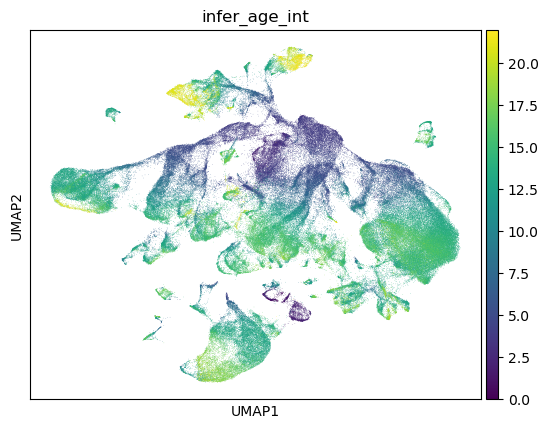

In [2]:
sc.pl.umap(sc_data, color=['infer_age_int'])

## 2. Using tow cell type to try to calculate difference between its

In [3]:
import numpy as np

sample_data = sc_data[np.in1d(sc_data.obs['celltype'], ['Malpighian tubule anlage', 'Malpighian tubule primordium'])]

In [4]:
sample_data

View of AnnData object with n_obs × n_vars = 2025 × 16725
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'cell', 'pANN', 'library', 'RNA_snn_res.0.5', 'seurat_clusters', 'collected_time', 'infer_age', 'infer_age_int', 'tissue_old', 'sub_cluster_number', 'celltype', 'tissue_update', 'germ_layer', 'subtype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_scvi', 'X_umap'

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


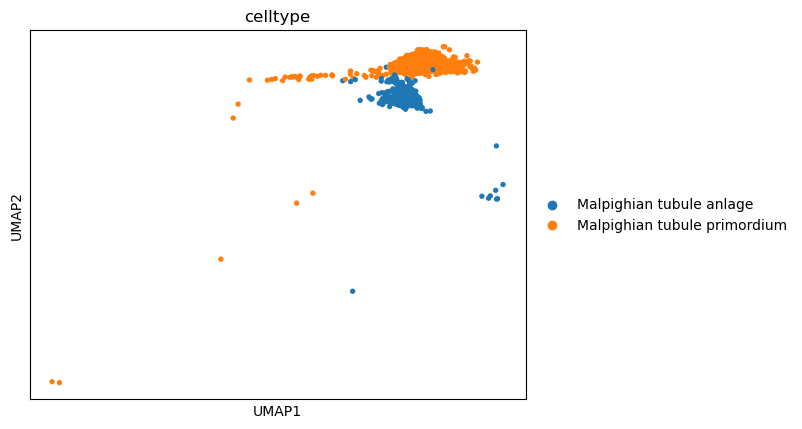

In [6]:
sc.pl.umap(sample_data, color='celltype')

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


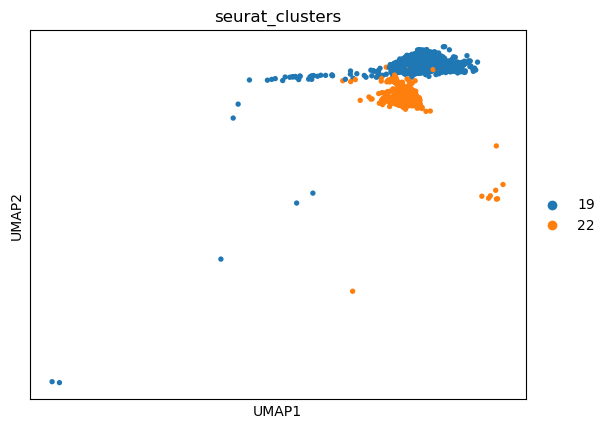

In [7]:
sc.pl.umap(sample_data, color='seurat_clusters')

In [41]:
from sklearn.metrics import silhouette_score

silhouette_score(sample_data.X, sample_data.obs.seurat_clusters.tolist())

0.118041165

## 3. batch calculating

In [3]:
import pandas as pd

connection = pd.read_csv('/home/ouyangkang/data/trajectory_graph/celltype_connection.csv')

In [4]:
from sklearn.metrics import silhouette_score
import numpy as np

node_edge = []

for lineage in connection.iterrows():
    node_data = sc_data[np.in1d(sc_data.obs['subtype'], [lineage[1][0], lineage[1][1]])]

    #if len(set(node_data.obs.celltype.tolist())) != 2:
    #    print(f"here should include two cell type: {lineage[1][0]} and {lineage[1][1]}, but just one {set(node_data.obs.celltype.tolist())}")
    #else:
    edge_value = silhouette_score(node_data.X, node_data.obs.subtype.tolist())
    node_edge.append([lineage[1][0], lineage[1][1], edge_value])

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [15]:
pd.DataFrame(node_edge, columns=['Celltype_1', 'Celltype_2', 'Score']).to_csv('/home/ouyangkang/data/trajectory_graph/score.csv')

In [16]:
sc_data

AnnData object with n_obs × n_vars = 238242 × 16725
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'cell', 'pANN', 'library', 'RNA_snn_res.0.5', 'seurat_clusters', 'collected_time', 'infer_age', 'infer_age_int', 'tissue_old', 'sub_cluster_number', 'celltype', 'tissue_update', 'germ_layer', 'subtype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_scvi', 'X_umap'

In [18]:
'cardioblasts' in set(sc_data.obs.subtype.tolist())

False

In [10]:
lineage[1][0], lineage[1][1]

('dorsal vessel primordium', 'cardioblasts')

In [6]:
set(node_data.obs.subtype.tolist())

{'dorsal vessel primordium'}

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


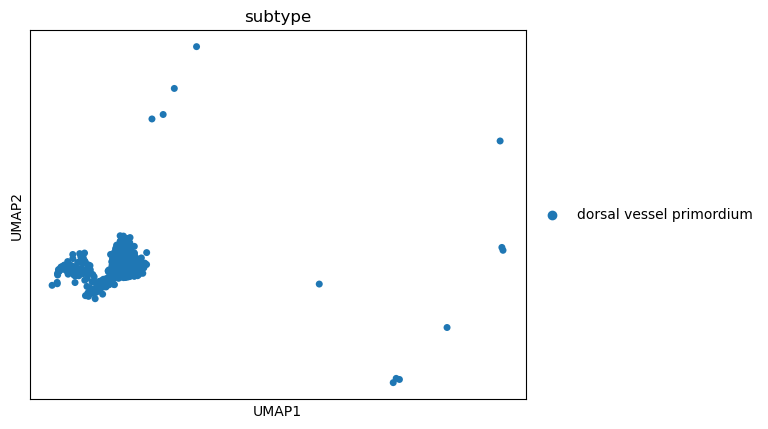

In [9]:
sc.pl.umap(node_data, color='subtype')

In [19]:
set('Malpighian tubule') in set(sc_data.obs.celltype.tolist())

False

In [30]:
pd.DataFrame(node_edge, columns=['Celltype_1', 'Celltype_2', 'Score']).to_csv('/home/ouyangkang/data/trajectory_graph/score.csv')

In [22]:
node_edge

[['Malpighian tubule anlage', 'Malpighian tubule primordium', 0.118041165]]

In [24]:
len(set(node_data.obs.seurat_clusters.tolist()))

1

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


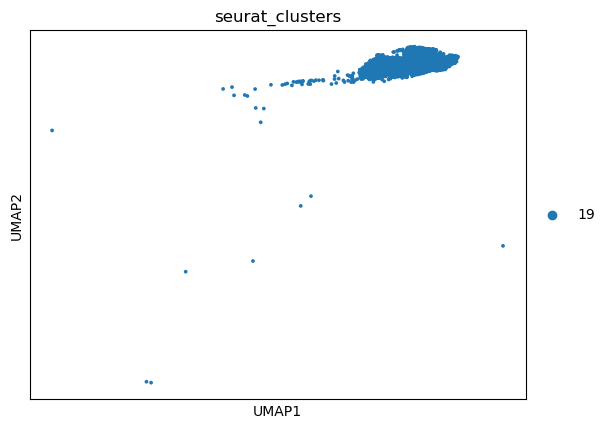

In [25]:
sc.pl.umap(node_data, color='seurat_clusters')

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


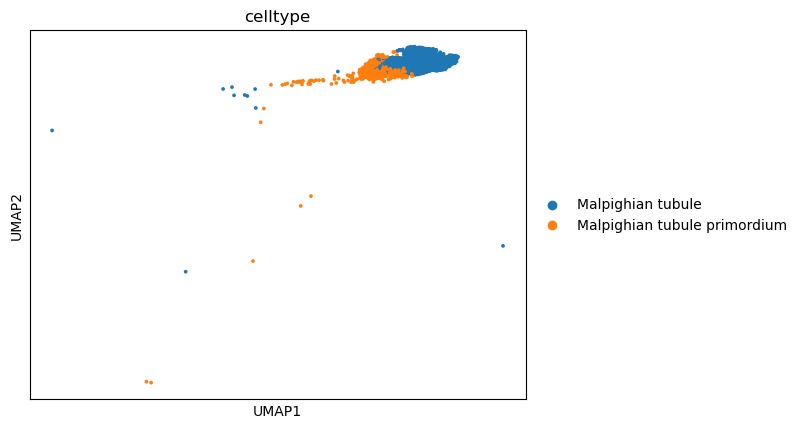

In [26]:
sc.pl.umap(node_data, color='celltype')